In [1]:
import os
import numpy as np
import pandas as pd
import gensim.models
from gensim import utils
from graph import *
import networkx as nx
import random

In [2]:
class Corpus:
    
    def __init__(self, pt, groundTruth, testProp, p, q):
        self.path = pt
        print('building train/test sets')
        self.build(pt, testProp,groundTruth)
        self.p = p
        self.q = q
        print('building graph')
        self.generateCorpus()
        
        pass
    
    def build(self, pt, testProp, groundTruth):
        #note: temp1 is the training/test set; temp2 is the graph
        df = pd.read_csv(pt).astype(str) 
        temp1 = pd.read_csv(groundTruth)
        print(list(temp1.columns))
        temp1 = self.generateNegativeSamples(temp1)
        self.trainTestSplit(temp1, testProp)
        self.buildGraph(df)
    
    def generateNegativeSamples(self,df):
        df['label'] = 1
        col1 = df.columns[0]
        col2 = df.columns[1]
        allItems = set(df[col1])
        negSamples = []
        for i, row in df.iterrows():
            source = row[col1]
            target = row[col2]
            negSamples.append((source, random.sample(allItems.difference(set([target])), 1)[0]))
        t = pd.DataFrame(negSamples, columns = [col1,col2])
        t['label'] = 0
        return pd.concat([t, df])
    
    
    def trainTestSplit(self, df, testProp):
        df = df.sample(len(df))
        nodes = set(df[df.columns[1]].values)
        nodes.update(set(df[df.columns[0]].values))
        self.nodes = [str(x) for x in list(nodes)]
        cutoff = int(len(df) * testProp)
        test = df.iloc[0:643]
        train = df.iloc[643:]
        self.train = train
        self.test = test
    
    def buildGraph(self, df):
        G=nx.Graph()
        
        temp = set([str(x) for x in df['source']])
        temp.update(set([str(x) for x in df['target']]))
        edges = tuple(zip([str(x) for x in list(df['source'])], [str(x) for x in list(df['target'])]))
        G.add_nodes_from(temp)
        G.add_edges_from(edges, weight = 1)
        self.G = G
    
    def generateCorpus(self):
        self.corpus = Graph(self.G, self.nodes, is_directed= False, p = self.p, q = self.q)
        self.corpus.preprocess_transition_probs()

In [3]:
class Model:
    
    def __init__(self, corpus, embedder = None, model = None):
        self.corpus = corpus
        self.embedder = embedder
        self.model = model
    
    def trainW2V(self, numWalks, walkLength, embedLength):
        sentences = test.corpus.simulate_walks(numWalks,walkLength)
        if (self.embedder == None):
            self.embedder = Word2Vec(sentences, size=embedLength, workers=4)
        else:
            self.embedder.build_vocab(more_sentences, update=True)
            self.embedder.train(sentences, total_examples=self.embedder.corpus_count, epochs=self.embedder.iter)
    
    def saveW2V(self, fname):
        self.embedder.save(fname)
    
    def loadW2V(self, fname):
        self.embedder = gensim.models.Word2Vec.load(fname)
    
    def trainModel(self):
        trainData = corpus.train
        pass
    
    def saveModel(self, fname):
        pass
    
    def loadModel(self, fname):
        pass
    
    def evaluate(self, setType = 'train'):
        pass
    
    

In [4]:
#note: place model into a seperate class with calls on Corpus

In [5]:
DF = pd.read_csv("../data/gen/abt_buy_graph.csv")

,source,target,type
0,38477,10011646,ground_truth
1,38475,10140760,ground_truth
2,33053,10221960,ground_truth
3,27248,10246269,ground_truth
4,25262,10315184,ground_truth
...,...,...,...
27893,36083,NaN,NaN
27894,201953026,NaN,NaN
27895,37469,NaN,NaN
27896,209297157,NaN,NaN


In [6]:
gensim.models.doc2vec.FAST_VERSION > -1


True

In [7]:
test = Corpus("../data/gen/abt_buy_graph.csv", '../data/Abt-Buy/abt_buy_perfectMapping.csv', 0.3, 1, 2)

building train/test sets
['idAbt', 'idBuy']
building graph


In [8]:
t = test.corpus.simulate_walks(1000,10)

Walk iteration:
1 / 1000
2 / 1000
3 / 1000
4 / 1000
5 / 1000
6 / 1000
7 / 1000
8 / 1000
9 / 1000
10 / 1000
11 / 1000
12 / 1000
13 / 1000
14 / 1000
15 / 1000
16 / 1000
17 / 1000
18 / 1000
19 / 1000
20 / 1000
21 / 1000
22 / 1000
23 / 1000
24 / 1000
25 / 1000
26 / 1000
27 / 1000
28 / 1000
29 / 1000
30 / 1000
31 / 1000
32 / 1000
33 / 1000
34 / 1000
35 / 1000
36 / 1000
37 / 1000
38 / 1000
39 / 1000
40 / 1000
41 / 1000
42 / 1000
43 / 1000
44 / 1000
45 / 1000
46 / 1000
47 / 1000
48 / 1000
49 / 1000
50 / 1000
51 / 1000
52 / 1000
53 / 1000
54 / 1000
55 / 1000
56 / 1000
57 / 1000
58 / 1000
59 / 1000
60 / 1000
61 / 1000
62 / 1000
63 / 1000
64 / 1000
65 / 1000
66 / 1000
67 / 1000
68 / 1000
69 / 1000
70 / 1000
71 / 1000
72 / 1000
73 / 1000
74 / 1000
75 / 1000
76 / 1000
77 / 1000
78 / 1000
79 / 1000
80 / 1000
81 / 1000
82 / 1000
83 / 1000
84 / 1000
85 / 1000
86 / 1000
87 / 1000
88 / 1000
89 / 1000
90 / 1000
91 / 1000
92 / 1000
93 / 1000
94 / 1000
95 / 1000
96 / 1000
97 / 1000
98 / 1000
99 / 1000
100

755 / 1000
756 / 1000
757 / 1000
758 / 1000
759 / 1000
760 / 1000
761 / 1000
762 / 1000
763 / 1000
764 / 1000
765 / 1000
766 / 1000
767 / 1000
768 / 1000
769 / 1000
770 / 1000
771 / 1000
772 / 1000
773 / 1000
774 / 1000
775 / 1000
776 / 1000
777 / 1000
778 / 1000
779 / 1000
780 / 1000
781 / 1000
782 / 1000
783 / 1000
784 / 1000
785 / 1000
786 / 1000
787 / 1000
788 / 1000
789 / 1000
790 / 1000
791 / 1000
792 / 1000
793 / 1000
794 / 1000
795 / 1000
796 / 1000
797 / 1000
798 / 1000
799 / 1000
800 / 1000
801 / 1000
802 / 1000
803 / 1000
804 / 1000
805 / 1000
806 / 1000
807 / 1000
808 / 1000
809 / 1000
810 / 1000
811 / 1000
812 / 1000
813 / 1000
814 / 1000
815 / 1000
816 / 1000
817 / 1000
818 / 1000
819 / 1000
820 / 1000
821 / 1000
822 / 1000
823 / 1000
824 / 1000
825 / 1000
826 / 1000
827 / 1000
828 / 1000
829 / 1000
830 / 1000
831 / 1000
832 / 1000
833 / 1000
834 / 1000
835 / 1000
836 / 1000
837 / 1000
838 / 1000
839 / 1000
840 / 1000
841 / 1000
842 / 1000
843 / 1000
844 / 1000
845 / 1000

In [197]:
mdl = gensim.models.Word2Vec(sentences = t, workers=-1, size=500, sg = 1, hs = 0, negative = 10)

RuntimeError: you must first build vocabulary before training the model

In [10]:
df = test.train
embedding1 = mdl[[str(x) for x in df.idAbt.values]]
embedding2 = mdl[[str(x) for x in df.idBuy.values]]
#data = np.concatenate([embedding1,embedding2], axis = 1)
data = np.array(embedding1 - embedding2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df2 = test.test
embedding1 = mdl[[str(x) for x in df2.idAbt.values]]
embedding2 = mdl[[str(x) for x in df2.idBuy.values]]
#data2 = np.concatenate([embedding1,embedding2], axis = 1)
data2 = np.array(embedding1 - embedding2)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
DF = pd.read_csv("../data/gen/abt_buy_graph.csv")

In [135]:
temp = pd.read_csv('../data/Abt-Buy/Abt.csv', engine = 'python')

In [133]:
temp2 = pd.read_csv('../data/Abt-Buy/Buy.csv', engine = 'python')

In [154]:
t = dict(temp.iloc[4])

In [158]:
t.pop('description')

KeyError: 'description'

In [169]:
DF[DF.source ==6284]

,source,target,type
83,6284,202812567,ground_truth
1099,6284,161,name
1100,6284,161wh,name
1101,6284,27028,name
1102,6284,bookshelf,name
1103,6284,bose,name
1104,6284,in,name
1105,6284,pair,name
1106,6284,speakers,name
1107,6284,white,name


In [35]:
values =[38477,33053]
t = values[0]

In [143]:
temp[temp.id == 38477]

,id,name,description,price
1028,38477,Linksys EtherFast 8-Port 10/100 Switch - EZXS88W,Linksys EtherFast 8-Port 10/100 Switch - EZXS8...,$44.00


In [126]:
temp = DF[DF.source ==10011646].iloc[1:14].dropna()[['source','target']].values


In [127]:
p = dict()
p[temp[0][0]] = temp[:,1]

In [128]:
p

{10011646: array(['ethernet', 'ezxs88w', 'linksys', 'switch', 'LINKSYS'],
       dtype=object)}

In [196]:
mdl.similar_by_vector('Netgear')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  """Entry point for launching an IPython kernel.


[('30591', 0.16317063570022583),
 ('dle3733w', 0.15770281851291656),
 ('203086857', 0.1538136601448059),
 ('cdi200', 0.1492869257926941),
 ('monitoring', 0.14548276364803314),
 ('unreal', 0.14273107051849365),
 ('hv30', 0.1353747397661209),
 ('34905', 0.1329105645418167),
 ('207876535', 0.12835608422756195),
 ('18970', 0.12759065628051758)]

In [ ]:
t = DF[[x in list(DF[DF.target == 'linksys'].source) for x in DF.source ]]

In [195]:
temp2[temp2.id == 10412788]

,id,name,description,manufacturer,price
26,10412788,Netgear ProSafe FS726TP 24 Port 10/100 Smart S...,"24 x 10/100Base-TX LAN, 2 x 10/100/1000Base-T",Netgear,NaN


In [190]:
t[t.source == 38473]

,source,target,type
8,38473,10333846,ground_truth
9317,38473,10,name
9318,38473,100,name
9319,38473,16,name
9320,38473,ef4116,name
9321,38473,etherfast4116,name
9322,38473,ethernet,name
9323,38473,linksys,name
9324,38473,port,name
9325,38473,switch,name


In [129]:
import networkx as nx

In [130]:
g = nx.Graph(p)

In [131]:
g.edges

EdgeView([(10011646, 'ethernet'), (10011646, 'ezxs88w'), (10011646, 'linksys'), (10011646, 'switch'), (10011646, 'LINKSYS')])

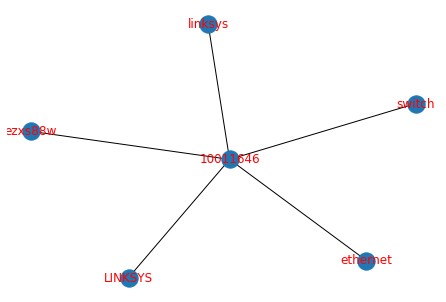

In [132]:
nx.draw(g, with_labels = True, font_color = 'red')

In [54]:
temp[temp.id > 38475].sort_values('id').iloc[0:10]

,id,name,description,price
1028,38477,Linksys EtherFast 8-Port 10/100 Switch - EZXS88W,Linksys EtherFast 8-Port 10/100 Switch - EZXS8...,$44.00
1029,38480,iRobot Robotic Floor Washer - 74249,iRobot Robotic Floor Washer - 74249/ Autonomou...,$299.00
1030,38483,Transcend 8GB Micro Secure Digital Memory Card...,Transcend 8GB Micro Secure Digital Memory Card...,$39.00
1031,38486,Transcend 133X High-Speed 8GB Compact Flash Ca...,Transcend 133X High-Speed 8GB Compact Flash Ca...,$38.00
1032,38492,Sony Telephoto Converter Lens - VCLDH1774,Sony Telephoto Converter Lens - VCLDH1774/ 1.7...,$169.99
1033,38500,DLO Black HybridShell For iPhone 3G - DLA4010717,DLO Black HybridShell For iPhone 3G - DLA40107...,$24.99
1034,38507,Linksys Black Media Center Extender - DMA2100,Linksys Black Media Center Extender - DMA2100/...,$119.00
1035,38511,Audiovox 7' Acrylic Digital Photo Frame - DPF701,Audiovox 7' Acrylic Digital Photo Frame - DPF7...,NaN
1036,38522,Flip Video F460 Black Mino HD Camcorder - F460B,Flip Video F460 Black Mino HD Camcorder - F460...,NaN
1037,38550,Samsung 2.1 Channel Bluetooth Home Theater Sys...,Samsung 2.1 Channel Bluetooth Home Theater Sys...,NaN


In [53]:
temp2.iloc[0:10]

,id,name,description,manufacturer,price
0,10011646,Linksys EtherFast EZXS88W Ethernet Switch - EZ...,Linksys EtherFast 8-Port 10/100 Switch (New/Wo...,LINKSYS,NaN
1,10140760,Linksys EtherFast EZXS55W Ethernet Switch,5 x 10/100Base-TX LAN,LINKSYS,NaN
2,10221960,Netgear ProSafe FS105 Ethernet Switch - FS105NA,NETGEAR FS105 Prosafe 5 Port 10/100 Desktop Sw...,Netgear,NaN
3,10246269,Belkin Pro Series High Integrity VGA/SVGA Moni...,1 x HD-15 - 1 x HD-15 - 10ft - Beige,Belkin,NaN
4,10315184,Netgear ProSafe JFS516 Ethernet Switch,Netgear ProSafe 16 Port 10/100 Rackmount Switc...,Netgear,NaN
5,10316920,LaCie Pocket Floppy Disk Drive - 706018,LaCie Pocket USB Floppy 1.44 MB,LACIE,NaN
6,10326220,Canon KP 36IP Print Cartridge / Paper Kit - 77...,36 Page 4' x 6',Canon,$9.99
7,10333368,Kensington Orbit Optical Trackball - USB w/PS2...,"Optical - USB, PS/2",Kensington,NaN
8,10333846,Linksys EtherFast EF4116 Ethernet Switch,16 x 10/100Base-TX LAN,LINKSYS,NaN
9,10333848,Linksys EtherFast EF4124 Ethernet Switch,24 x 10/100Base-TX LAN,LINKSYS,$64.99


In [203]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [199]:
vocab = list(mdl.wv.vocab)
X = mdl[vocab]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [200]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

In [206]:
vocab[0:10]

['202900041',
 'turbo',
 'c994s',
 'one',
 '206780877',
 'advanced',
 '33965',
 '205761530',
 'Klipsch',
 'nan']

In [224]:
df = pd.DataFrame(X_tsne[0:500], index=vocab[0:500], columns=['x', 'y'])

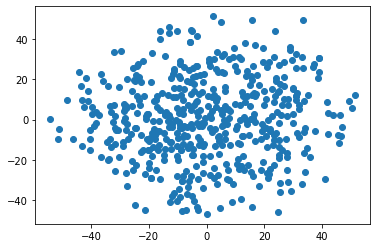

In [225]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])
#for word, pos in df.iterrows():
#    ax.annotate(word, pos)

In [216]:
temp[temp.id == 33965]

,id,name,description,price
554,33965,Logitech Harmony One Advanced Universal Remote...,Logitech Harmony One Advanced Universal Remote...,$249.00


In [236]:
DF[DF.type == 'price'].iloc[0:10]

,source,target,type
23625,580,"(179.992, 399.0]",price
23626,4696,"(31.358, 92.196]",price
23627,6284,"(92.196, 179.992]",price
23628,6493,"(179.992, 399.0]",price
23629,7936,"(31.358, 92.196]",price
23630,9312,"(-0.001, 31.358]",price
23631,9314,"(-0.001, 31.358]",price
23632,9355,"(92.196, 179.992]",price
23633,9546,"(179.992, 399.0]",price
23634,9646,"(31.358, 92.196]",price


In [238]:
from re import sub
from decimal import Decimal

money = '$6,150,593.22'
value = Decimal(sub(r'[^\d.]', '', money))

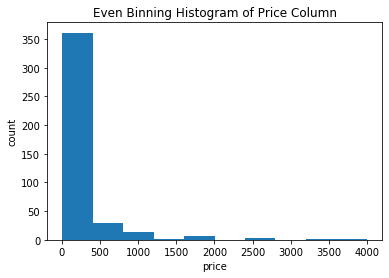

In [249]:
plt.hist([float(Decimal(sub(r'[^\d.]', '', money))) for money in temp.price.dropna()])
plt.xlabel('price')
plt.ylabel('count')
plt.title('Even Binning Histogram of Price Column')
plt.show()

In [62]:
from sklearn.svm import SVC

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
#model = SVC(C = 1)
model = AdaBoostClassifier()

In [82]:
len(df.label)
data.shape
data.shape

(1551, 500)

In [83]:
model.fit(data, df.label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [84]:
model.score(data, df.label)

0.7427466150870407

In [85]:
model.score(data2, df2.label)

0.5069984447900466

In [ ]:
204238996 in pd.read_csv('../data/Abt-Buy/abt_buy_perfectMapping.csv').idBuy

In [ ]:
pd.read_csv('../data/Abt-Buy/abt_buy_perfectMapping.csv')

In [ ]:
mdl.

In [ ]:
test.corpus.simulate_walks(10, 10)

In [ ]:
test.test.label.mean()

In [ ]:
test.train.label.mean()

In [ ]:
df = pd.read_csv("../data/gen/abt_buy_graph.csv")

In [ ]:
temp1 = df[df['type'] == 'ground_truth']
temp2 = df[df['type'] != 'ground_truth']

In [ ]:
temp1 = temp1.drop(columns = 'type')

In [ ]:
graph = nx.fast_gnp_random_graph(n=100, p=0.5)

In [ ]:
graph[0][4]

In [ ]:
Graph()

In [ ]:
allItems = set(temp2.source)

In [ ]:
G=nx.Graph()

In [ ]:
temp = set(df.source)
len(temp)

In [ ]:
temp.update(set(df.target))

In [ ]:
temp = [str(x) for x in list(temp)]

In [ ]:
len(temp)

In [ ]:
G.add_nodes_from(temp)

In [ ]:
edges = tuple(zip([str(x) for x in list(df['source'])], [str(x) for x in list(df['target'])]))

In [ ]:
G.add_edges_from(edges)

In [ ]:
list(G.neighbors('nan'))

In [ ]:
#G.nodes

In [ ]:
#temp

In [ ]:
df = pd.read_csv("../data/gen/abt_buy_graph.csv")

In [ ]:
df[['target','type']]

In [ ]:
utils.simple_preprocess('cat dog')

In [ ]:

sentences = ['dog, cat']
model = gensim.models.Word2Vec(sentences=utils.simple_preprocess('cat dog'))